In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal

train = pd.read_csv('train.csv')
original_signal = train['1']
nomalized_signal = (train['1'] - train['1'].min()) / ((train['1'].max() - train['1'].min()))

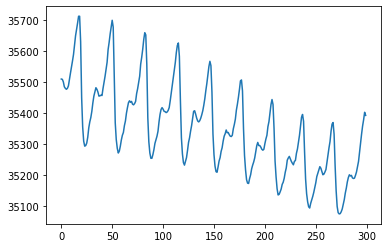

In [2]:
plt.plot(original_signal)
plt.show()

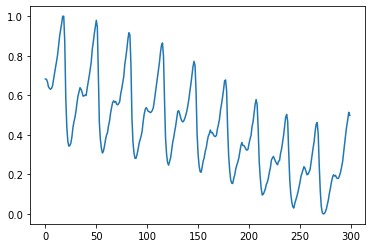

In [3]:
plt.plot(nomalized_signal)
plt.savefig('normalized')
plt.show()

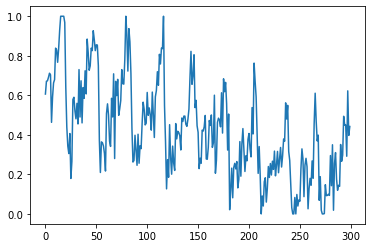

In [4]:
### Gaussian noise
noise = np.random.normal(0., 0.01 ** 0.5, nomalized_signal.shape)
out = nomalized_signal + noise
gaussian_signal = np.clip(out, 0., 1.)
plt.plot(gaussian_signal)
plt.savefig('gaussian')
plt.show()

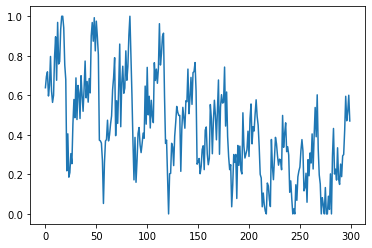

In [5]:
### Local variance noise
local_var = np.zeros_like(nomalized_signal) + 0.01
out = nomalized_signal + np.random.normal(0, local_var ** 0.5)
local_var_noise = np.clip(out, 0., 1.)
plt.plot(local_var_noise)
plt.savefig('local_var')
plt.show()

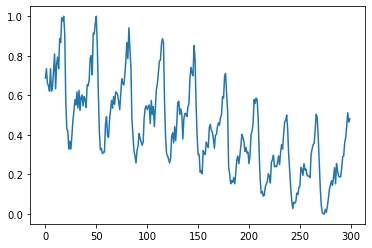

In [6]:
### Poisson noise
vals = len(np.unique(nomalized_signal))
vals = 2 ** np.ceil(np.log2(vals))
out = np.random.poisson(nomalized_signal * vals) / float(vals)
poisson_signal = np.clip(out, 0., 1.)
plt.plot(poisson_signal)
plt.savefig('poisson')
plt.show()

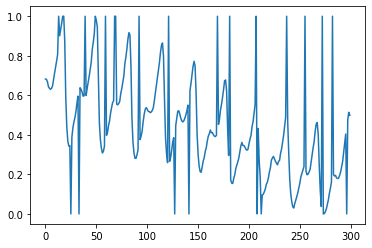

In [7]:
### Salt and pepper noise
sp_signal = nomalized_signal.copy()
p = 0.05    #amount
q = 0.5    #salt_vs_pepper
flipped = np.random.choice([True, False], size=nomalized_signal.shape, p=[p, 1 - p])
salted = np.random.choice([True, False], size=nomalized_signal.shape, p=[q, 1 - q])
peppered = ~salted
sp_signal[flipped & salted] = 1.
sp_signal[flipped & peppered] = 0.
plt.plot(sp_signal)
plt.savefig('salt_and_pepper')
plt.show()

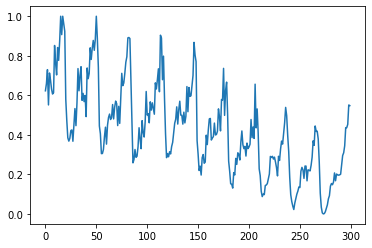

In [8]:
### Speckle noise
noise = np.random.normal(0., 0.01 ** 0.5, nomalized_signal.shape)
out = nomalized_signal + nomalized_signal * noise
speckle_signal = np.clip(out, 0., 1.)
plt.plot(speckle_signal)
plt.savefig('speckle')
plt.show()

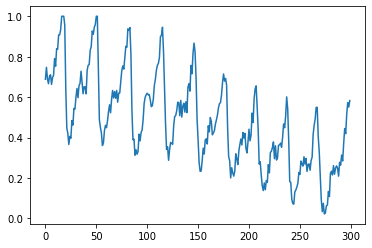

In [9]:
### Uniform noise
noise = np.random.uniform(low = 0., high = 0.1, size = nomalized_signal.shape)
out = nomalized_signal + noise
uniform_signal = np.clip(out, 0., 1.)
plt.plot(uniform_signal)
plt.savefig('uniform')
plt.show()

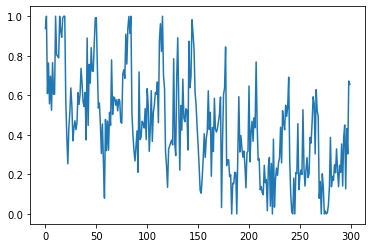

In [10]:
### Laplace noise
noise = np.random.laplace(loc = 0., scale = 0.1, size = nomalized_signal.shape)
out = nomalized_signal + noise
laplace_signal = np.clip(out, 0., 1.)
plt.plot(laplace_signal)
plt.savefig('laplace')
plt.show()

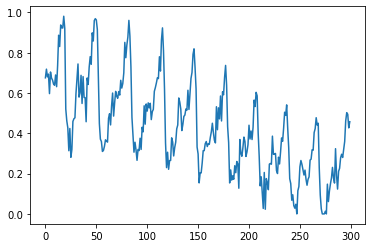

In [13]:
### AWGN
x_watts = nomalized_signal ** 2
x_db = 10 * np.log10(x_watts)

# Set a target SNR
target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
out = nomalized_signal + noise
awgn_signal = np.clip(out, 0., 1.)

plt.plot(awgn_signal)
plt.savefig('white')
plt.show()

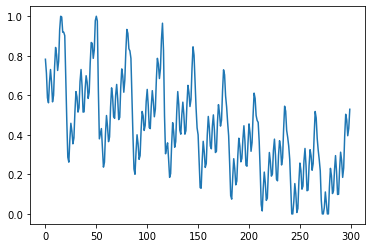

In [12]:
### add cosine signal
sampling_frequency = 50
var = 0.1
time_step = 1/sampling_frequency
max_time = 6
t = np.arange(0,max_time, time_step)
cos = np.cos(2*np.pi*60*t)
out = nomalized_signal + var*cos
cos_signal = np.clip(out, 0, 1.)
plt.plot(cos_signal)
plt.savefig('cosine')
plt.show()